Davies-Bouldin Index (DB Index): 1.280858513594155


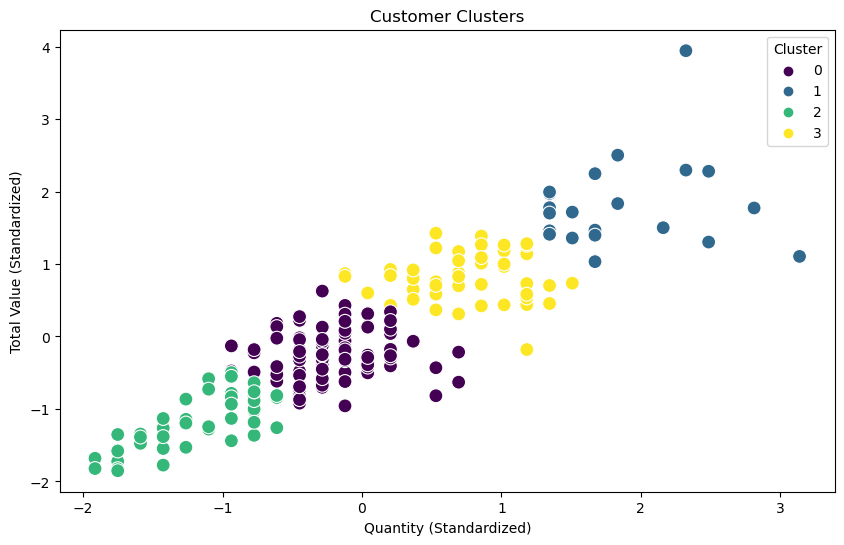

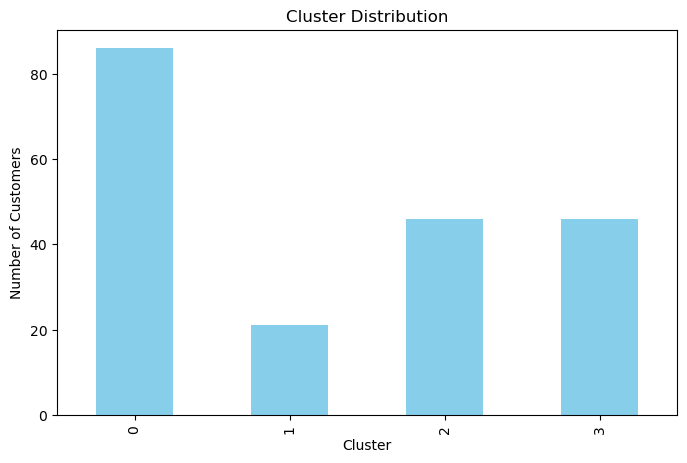

Clustering results saved to 'Customer_Segmentation.csv'.


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("C:\\Users\\VINOD\\Downloads\\Customers.csv")
transactions = pd.read_csv("C:\\Users\\VINOD\\Downloads\\Transactions.csv")

# Merge datasets to include customer profiles with their transactions
customer_transactions = transactions.merge(customers, on="CustomerID", how="left")

# Aggregate transaction data for each customer
customer_profiles = customer_transactions.groupby("CustomerID").agg({
    "Quantity": "sum",
    "TotalValue": "sum",
    "Region": lambda x: x.mode()[0],
}).reset_index()

# Encode categorical features
customer_profiles = pd.get_dummies(customer_profiles, columns=["Region"], drop_first=True)

# Standardize the data for clustering
scaler = StandardScaler()
numerical_columns = ["Quantity", "TotalValue"]
customer_profiles[numerical_columns] = scaler.fit_transform(customer_profiles[numerical_columns])

# Perform clustering (choosing KMeans as the clustering algorithm)
optimal_clusters = 4  # Assumed value; you can optimize this further
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_profiles["Cluster"] = kmeans.fit_predict(customer_profiles[numerical_columns + list(customer_profiles.columns[3:])])

# Calculate Davies-Bouldin Index (DB Index)
db_index = davies_bouldin_score(customer_profiles[numerical_columns + list(customer_profiles.columns[3:-1])], customer_profiles["Cluster"])
print(f"Davies-Bouldin Index (DB Index): {db_index}")

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=customer_profiles, 
    x="Quantity", 
    y="TotalValue", 
    hue="Cluster", 
    palette="viridis", 
    s=100
)
plt.title("Customer Clusters")
plt.xlabel("Quantity (Standardized)")
plt.ylabel("Total Value (Standardized)")
plt.legend(title="Cluster")
plt.show()

# Visualize cluster distribution
plt.figure(figsize=(8, 5))
customer_profiles["Cluster"].value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()

# Save clustering results to CSV
customer_profiles.to_csv("Customer_Segmentation.csv", index=False)
print("Clustering results saved to 'Customer_Segmentation.csv'.")
